In [12]:
from functools import partial

import numpy as np
import pandas as pd
from scipy.special import betainc
from numpy.polynomial import Polynomial

<Axes: >

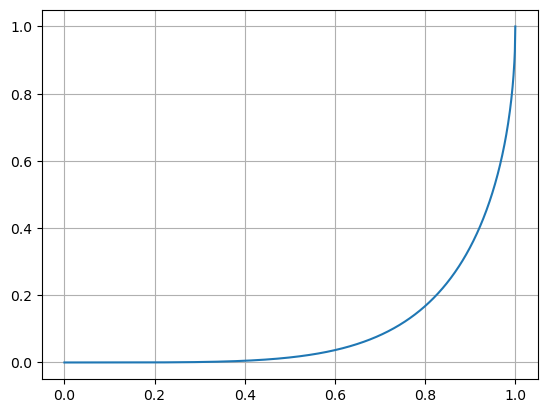

In [31]:
x = np.linspace(0, 1, 1001)
y = betainc(4.5, 0.5, x)
pd.Series(y, index=x).plot(grid=True)

In [33]:
poly = Polynomial.fit(x, y, 40, domain=[0, 1], window=[0, 1])
poly

Polynomial([ 9.06920151e-04, -3.35522142e-01,  2.88287534e+01, -1.05833145e+03,
        2.09195197e+04, -2.50197496e+05,  1.92969984e+06, -9.89960544e+06,
        3.38653403e+07, -7.44510449e+07,  9.18912706e+07, -2.69613148e+07,
       -7.20457108e+07,  4.51157397e+07,  7.11369125e+07, -2.72044724e+07,
       -8.17832297e+07, -1.99727035e+07,  6.75582509e+07,  7.43426970e+07,
       -1.57110455e+06, -7.65995930e+07, -7.73179116e+07, -5.72779320e+06,
        7.26754120e+07,  9.05507673e+07,  3.30811911e+07, -5.38272788e+07,
       -1.01135592e+08, -6.94245070e+07,  2.05012032e+07,  9.99867114e+07,
        1.01470464e+08,  1.34957591e+07, -9.73327252e+07, -1.24503025e+08,
       -1.43975831e+07,  1.39427222e+08,  1.08447931e+08, -1.90497268e+08,
        5.94062003e+07], domain=[0., 1.], window=[0., 1.], symbol='x')

<Axes: >

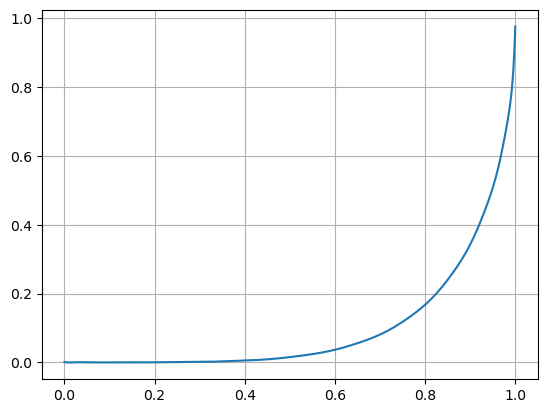

In [35]:
yf = (x[:, None]**np.arange(41) * poly.coef).sum(axis=1)
pd.Series(yf, index=x).plot(grid=True)

<Axes: >

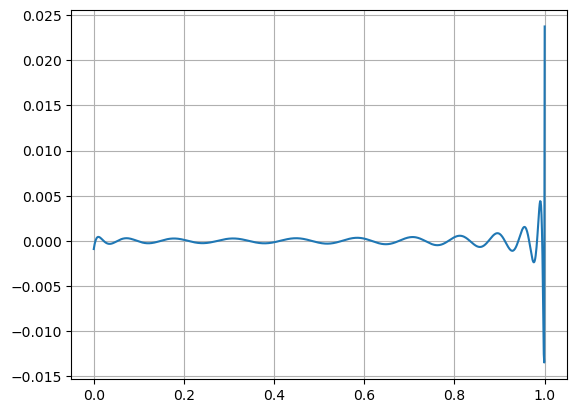

In [36]:
pd.Series(y - yf, index=x).plot(grid=True)